In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### 1.) Image Resize to 10, 30, 50%

In [3]:
img = plt.imread('Quiz.png')

In [4]:
def resize(img, percent):
    h = int(img.shape[0] * percent)
    w = int(img.shape[1] * percent)
    
    return cv2.resize(img, (w,h))
    
    

In [5]:
img10 = resize(img, 0.1)
img30 = resize(img, 0.3)
img50 = resize(img, 0.5)

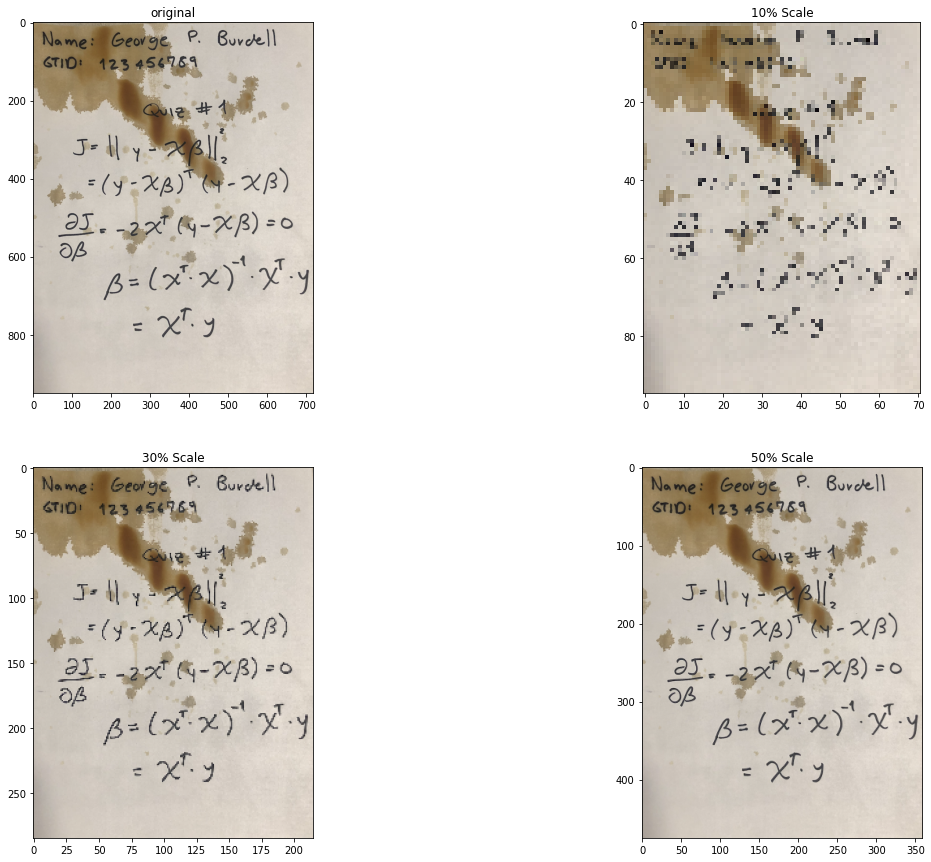

In [6]:
plt.subplots(nrows=2,ncols=2, figsize=(20,15))

plt.subplot(221)
plt.imshow(img)
plt.title('original')

plt.subplot(222)
plt.imshow(img10)
plt.title('10% Scale')

plt.subplot(223)
plt.imshow(img30)
plt.title('30% Scale')

plt.subplot(224)
plt.imshow(img50)
plt.title('50% Scale')

plt.show()

### 2.) Convert to grayscale

In [7]:
gray = (cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) * 255).astype('int32')
gray10 = (cv2.cvtColor(img10, cv2.COLOR_RGB2GRAY) * 255).astype('int32')
gray30 = (cv2.cvtColor(img30, cv2.COLOR_RGB2GRAY) * 255).astype('int32')
gray50 = (cv2.cvtColor(img50, cv2.COLOR_RGB2GRAY) * 255).astype('int32')

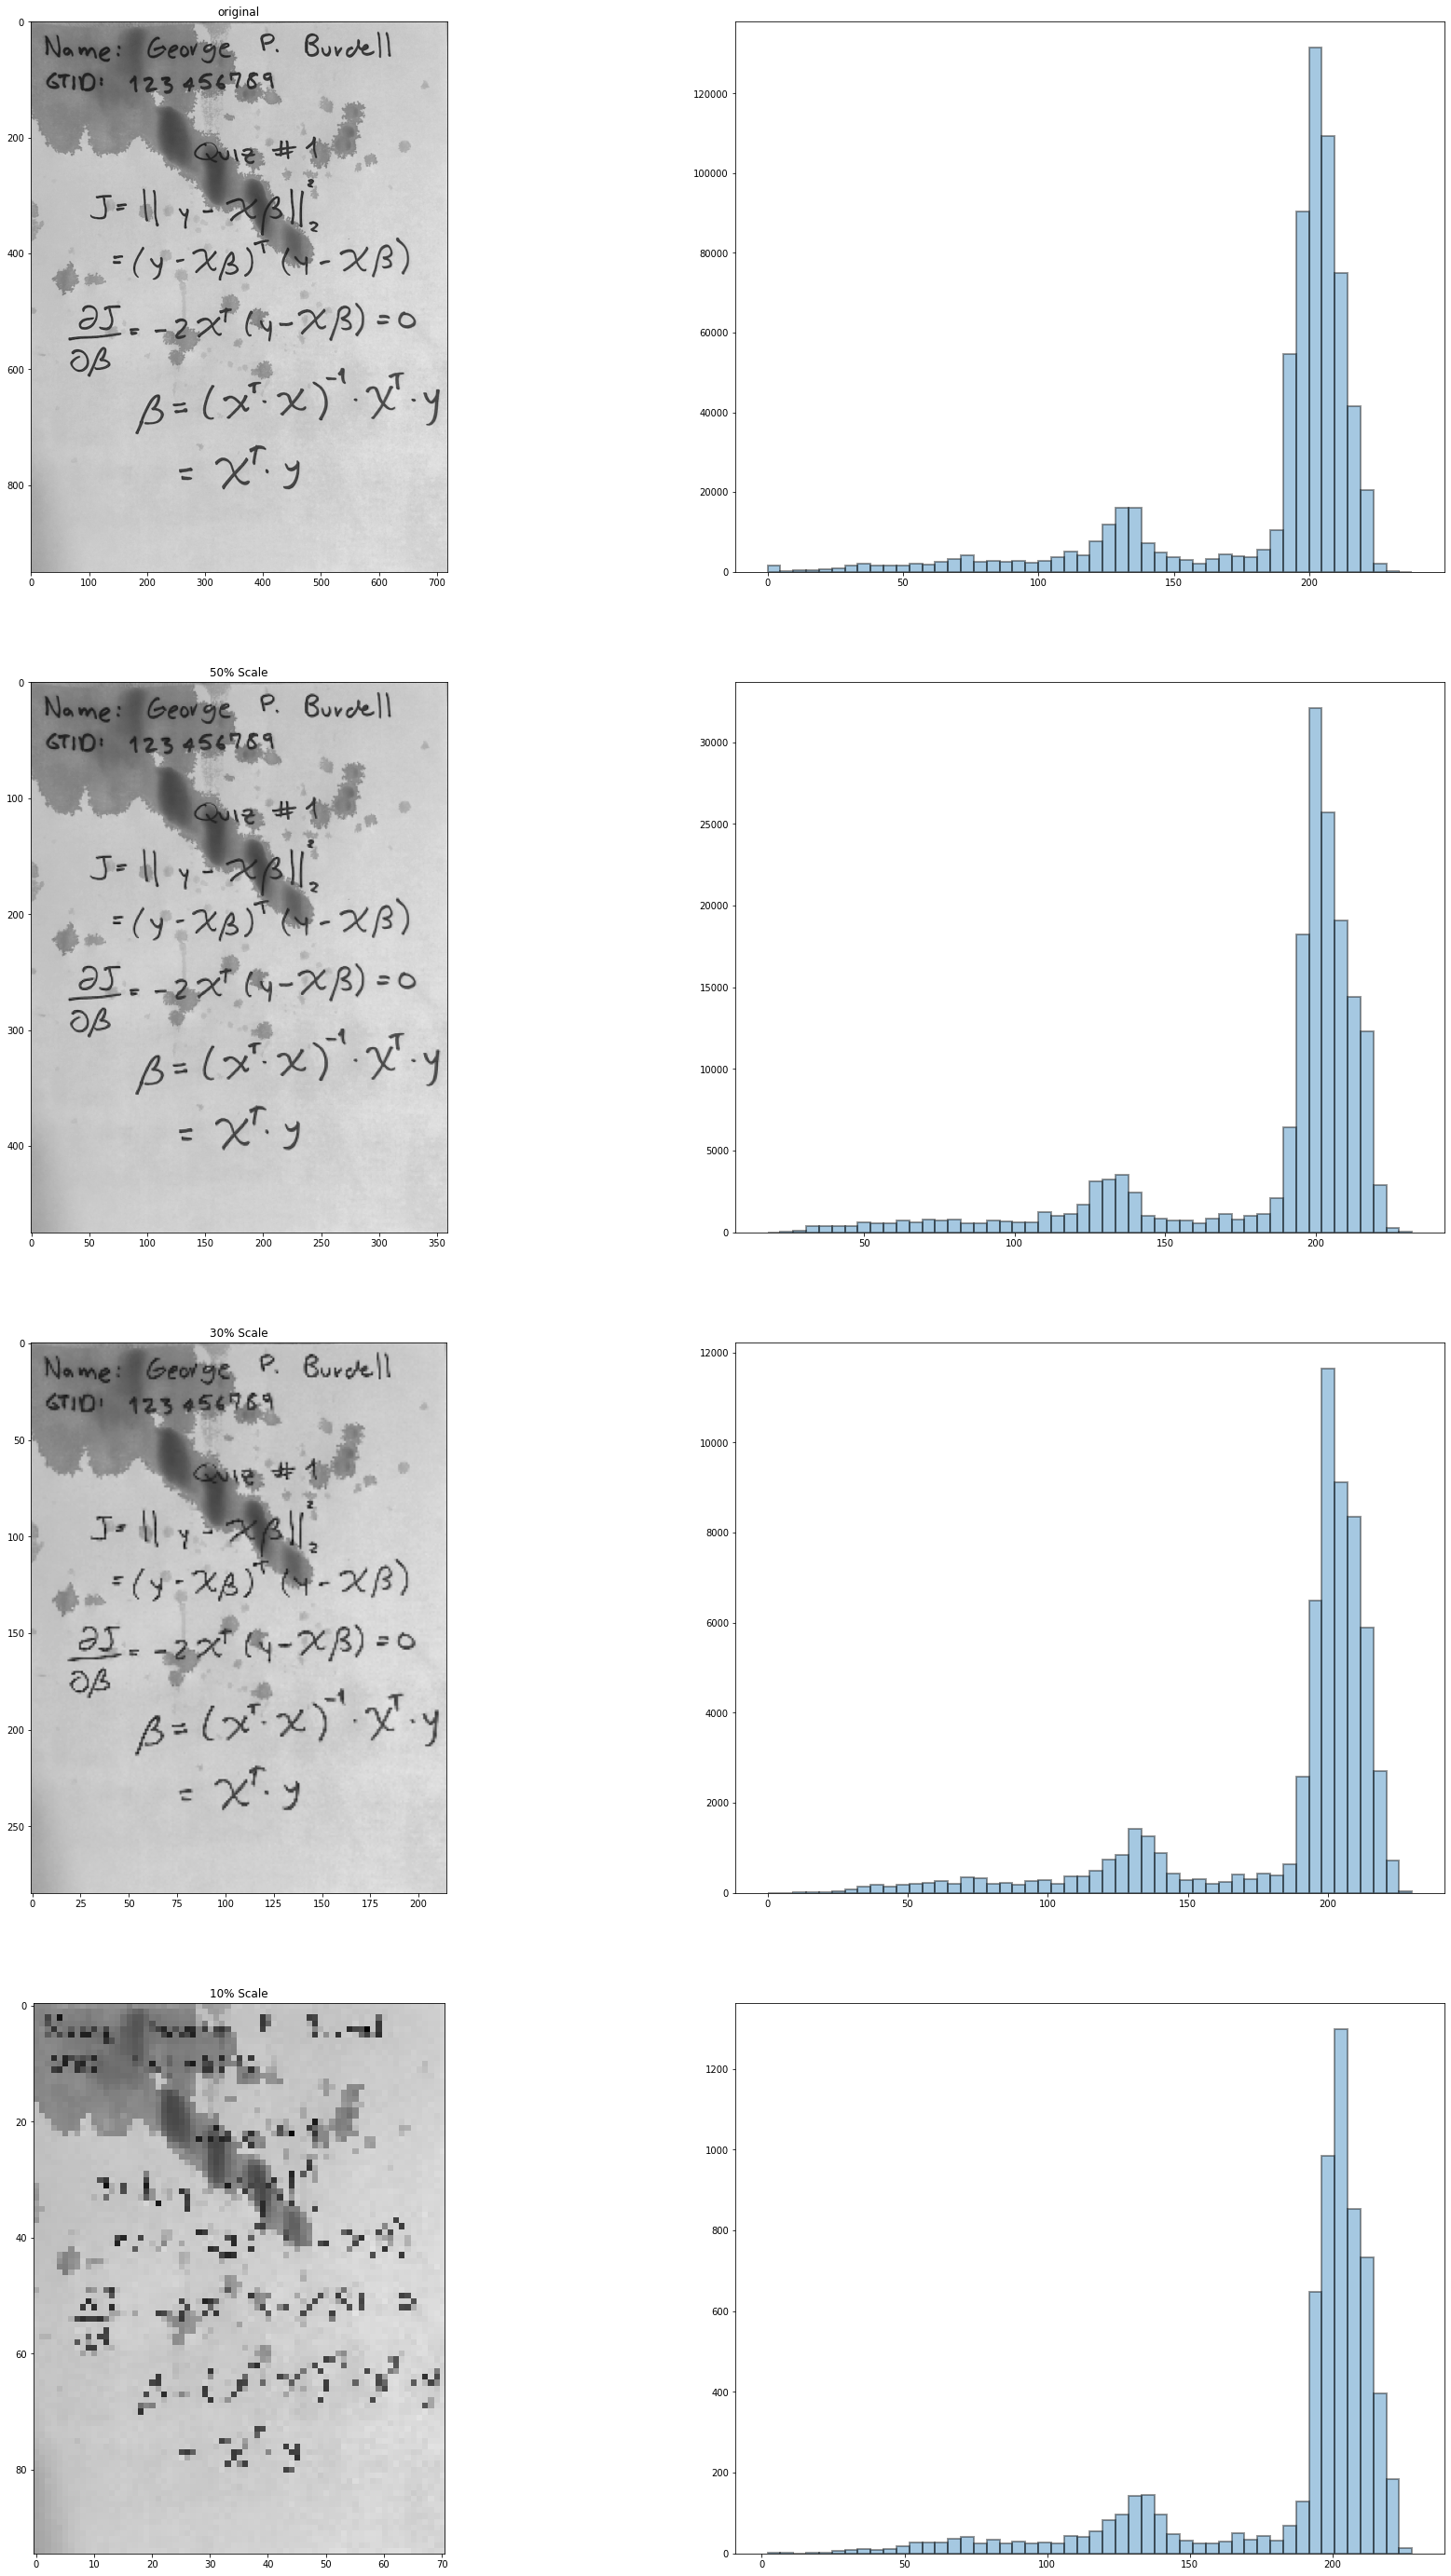

In [8]:
plt.subplots(nrows=4,ncols=2, figsize=(30,50))

plt.subplot(421)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.title('original')

plt.subplot(422)
sns.distplot(gray.reshape(-1),kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

plt.subplot(423)
plt.imshow(gray50, cmap='gray', vmin=0, vmax=255)
plt.title('50% Scale')


plt.subplot(424)
sns.distplot(gray50.reshape(-1),kde=False,hist_kws=dict(edgecolor="k", linewidth=2))


plt.subplot(425)
plt.imshow(gray30, cmap='gray', vmin=0, vmax=255)
plt.title('30% Scale')

plt.subplot(426)
sns.distplot(gray30.reshape(-1),kde=False, hist_kws=dict(edgecolor="k", linewidth=2))

plt.subplot(427)
plt.imshow(gray10, cmap='gray', vmin=0, vmax=255)
plt.title('10% Scale')

plt.subplot(428)
sns.distplot(gray10.reshape(-1),kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

plt.show()

### Image Selection
The 50% image looks to be the best candidate. It reduces the original image from > 6 million pixels to approx 1.7 million pixels while maintaining sufficient resolution. The 30% and 10% appear to be too grainy, and probably will begin to lose informational structure as transformations are later applied

### 3.) Pixel Shifting

In [9]:
def pixelshift(image, s):
    img = image.copy()
    img += s
    img[img>255] = 255
    img[img<0] = 0
    return img

In [10]:
shift = pixelshift(gray50, 100)

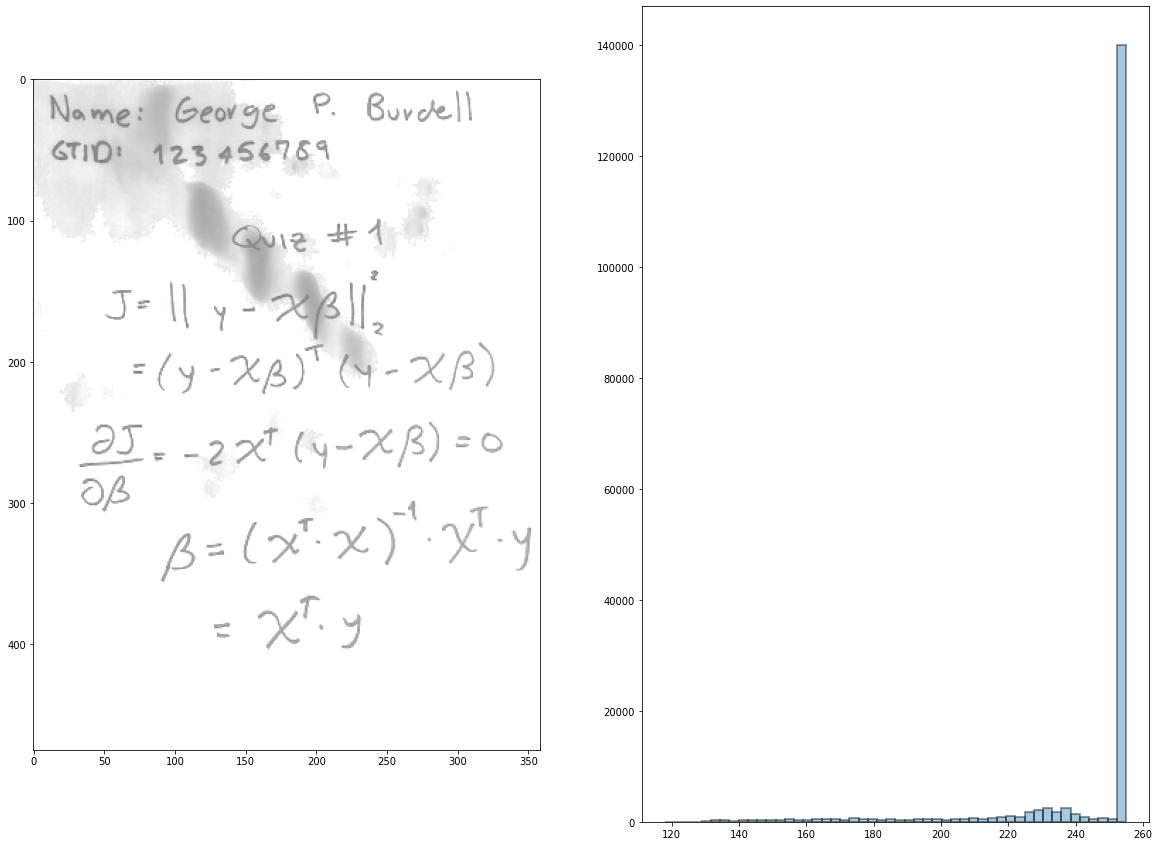

In [11]:
plt.subplots(nrows=1, ncols=2, figsize=(20,15))
plt.subplot(121)
plt.imshow(shift, cmap='gray', vmin=0, vmax=255)

plt.subplot(122)
sns.distplot(shift.reshape(-1),kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

plt.show()

### 4.) Histogram Stretching

In [12]:
def stretch(image):
    
    img = image.copy()
    pmin = np.min(img)

    #max pixel intensity
    pmax = np.max(img)

    #lambda
    lam = 255

    #hist stretching function
    s = lambda x: ((x - pmin) / (pmax - pmin)) * lam
    
    
    return s(img).astype(int)

In [13]:
img_stretch = stretch(gray50)

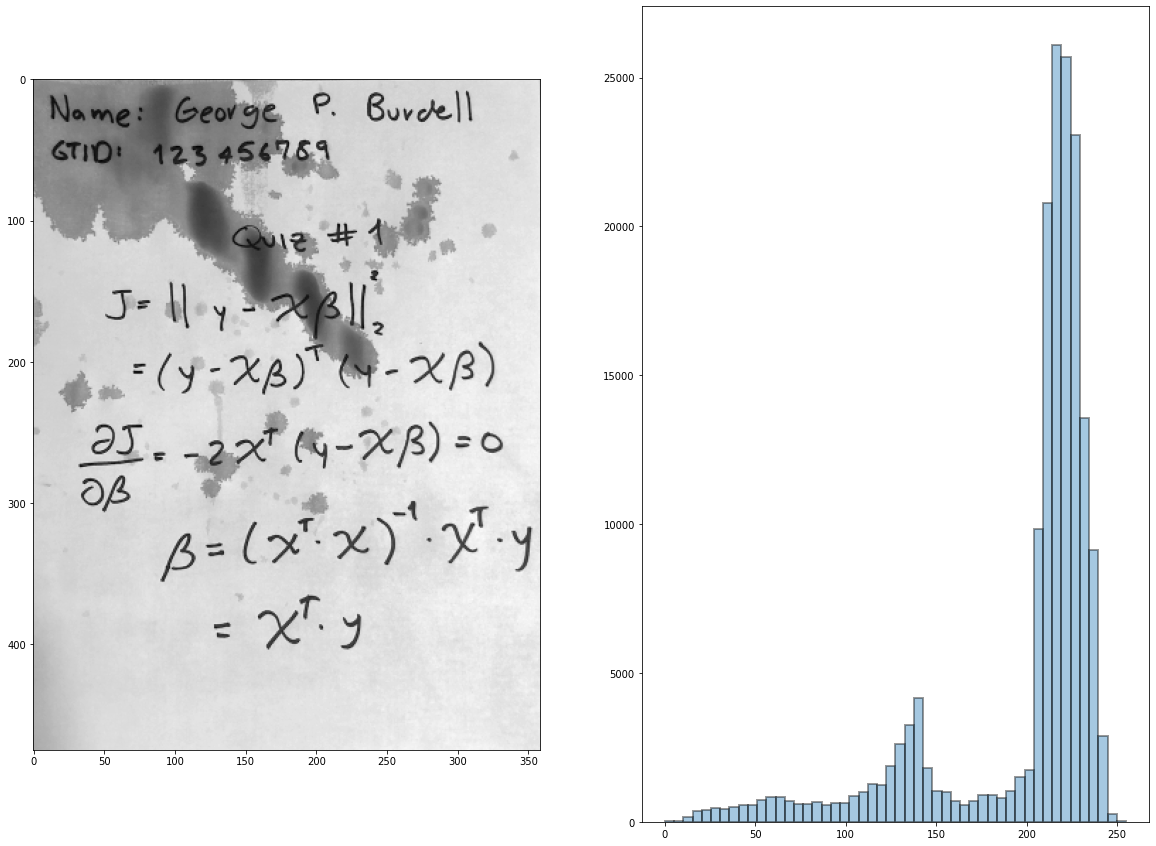

In [14]:
plt.subplots(nrows=1, ncols=2, figsize=(20,15))
plt.subplot(121)
plt.imshow(img_stretch, cmap='gray', vmin=0, vmax=255)

plt.subplot(122)
sns.distplot(img_stretch.reshape(-1),kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

plt.show()

### 5.) Linear (negative image)

In [15]:
def linear(image):
    img = image.copy()
    lin = lambda x: (256 - 1) - x
    
    return lin(img).astype(int)

In [16]:
lin_img = linear(gray50)

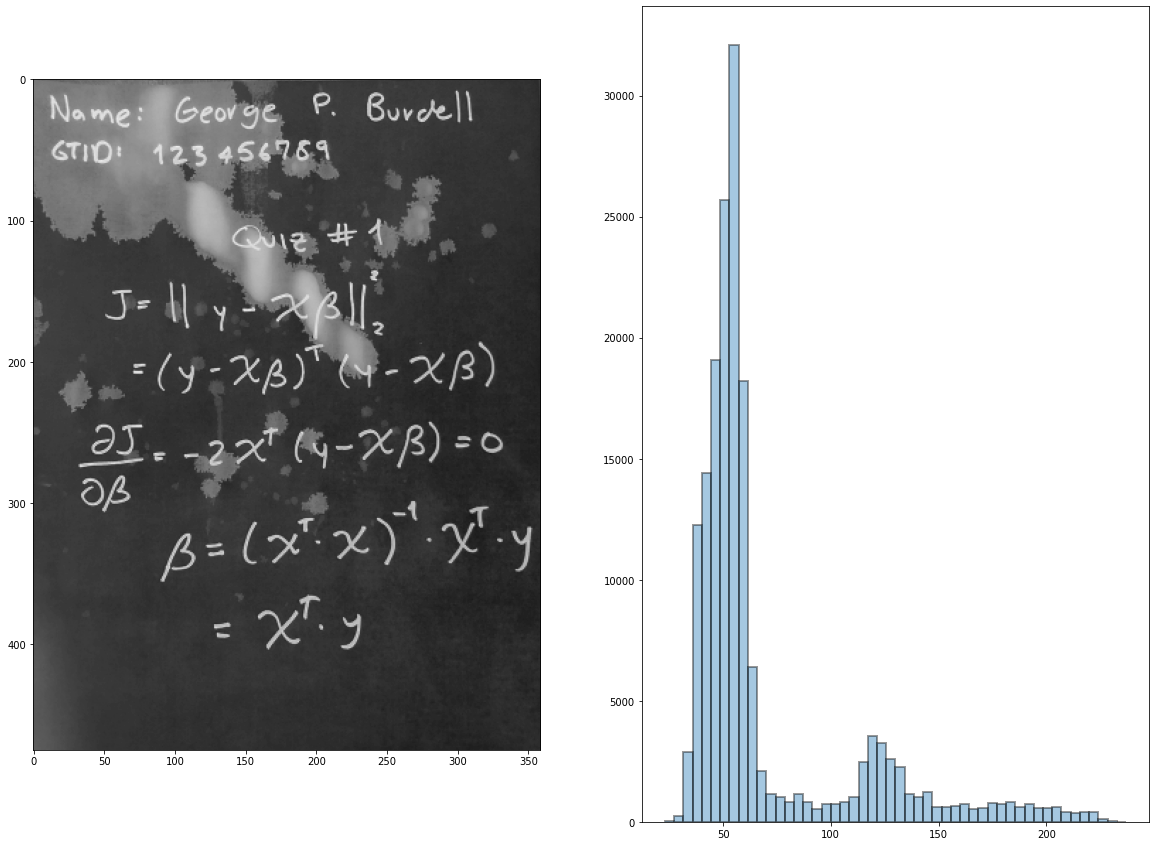

In [17]:
plt.subplots(nrows=1, ncols=2, figsize=(20,15))
plt.subplot(121)
plt.imshow(lin_img, cmap='gray', vmin=0, vmax=255)

plt.subplot(122)
sns.distplot(lin_img.reshape(-1),kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

plt.show()

### 6.) logarthimic transformation

In [18]:
def log(image):
    img = image.copy()
    c=45
    
    logpix = lambda x: c * np.log(x + 1)
    
    return logpix(img).astype(int)

In [19]:
log_img = log(gray50)

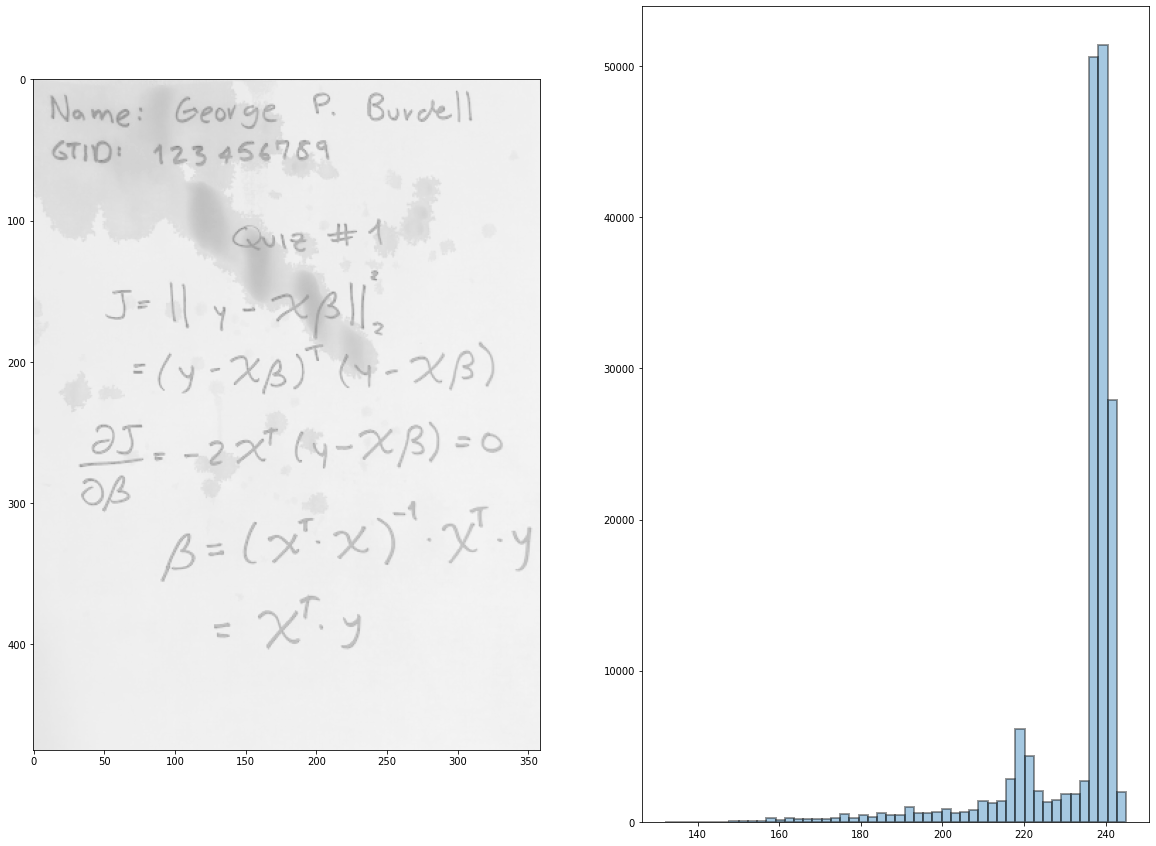

In [20]:
plt.subplots(nrows=1, ncols=2, figsize=(20,15))
plt.subplot(121)
plt.imshow(log_img, cmap='gray', vmin=0, vmax=255)

plt.subplot(122)
sns.distplot(log_img.reshape(-1),kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

plt.show()

### 7.) Power Function Transformation

In [21]:
def power(image):
    img = image.copy()
    c=0.1
    gam = 1.5
    
    powpix = lambda x: c * x**gam
    img = powpix(img).astype(int)
    
    img[img > 255] = 255
    
    return img

In [22]:
pow_img = power(gray50)

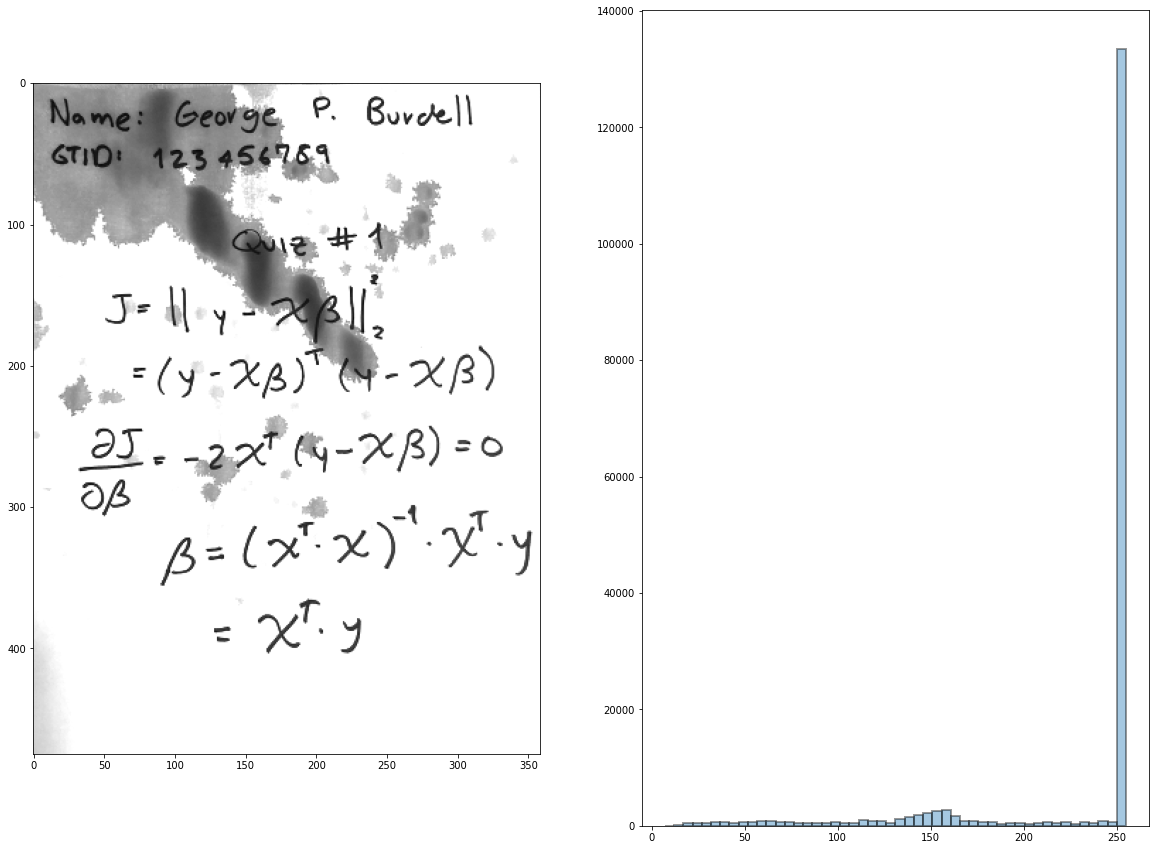

In [23]:
plt.subplots(nrows=1, ncols=2, figsize=(20,15))
plt.subplot(121)
plt.imshow(pow_img, cmap='gray', vmin=0, vmax=255)

plt.subplot(122)
sns.distplot(pow_img.reshape(-1),kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

plt.show()

### 8.) Black and White

In [24]:
def bnw(image, thresh):
    img = image.copy()
    img[img <= thresh] = 0
    img[img > thresh] = 1
    
    return img

### linear image to black and white

In [25]:
lin_bw = bnw(lin_img, 183)

### power image to black and white

In [26]:
pow_bw = bnw(pow_img, 61)

### logarithmic image to black and white

In [27]:
log_bw = bnw(log_img, 193)

### histogram stretch to black and white

In [28]:
stretch_bw = bnw(img_stretch, 65)

### Pixel shift to black and white

In [29]:
shift_bw = bnw(shift, 173)

### All results

In [30]:
results = [lin_bw, pow_bw, log_bw, stretch_bw, shift_bw]
titles = ['linear transform', 'power transform', 'log transform', 'histogram stretch', 'pixel shift']

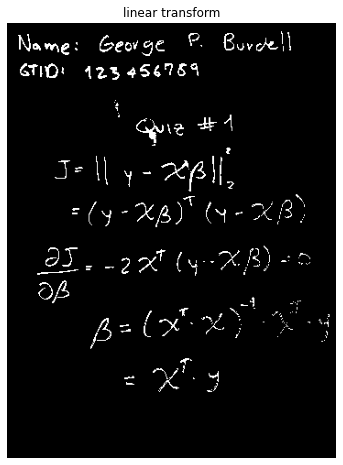

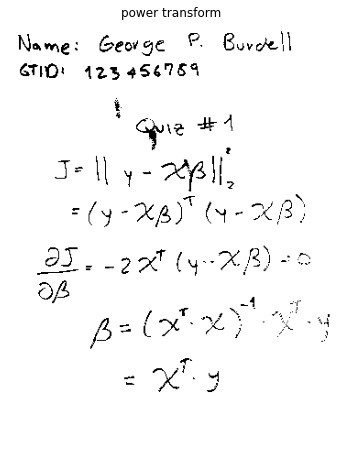

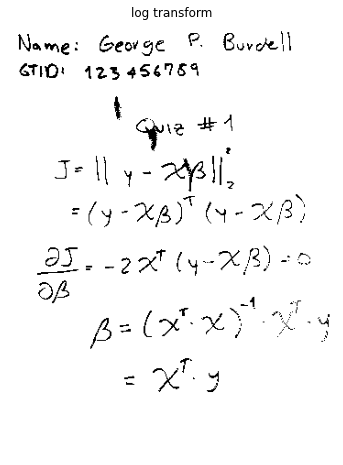

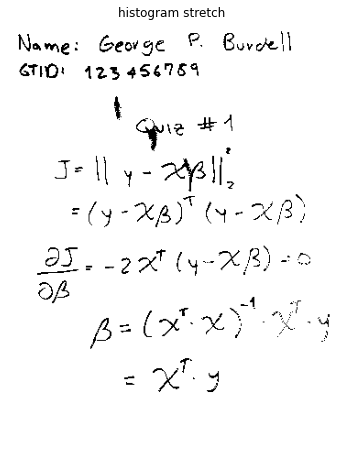

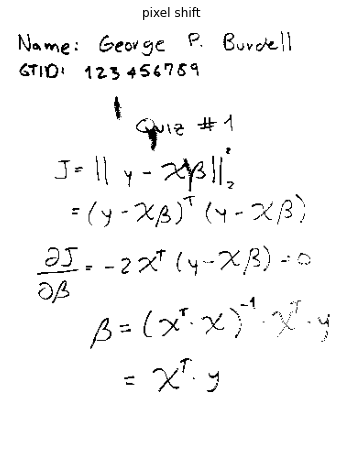

In [31]:
for i in range(len(results)):
    plt.figure(figsize=(15,8))
    plt.imshow(results[i], cmap='gray')
    plt.axis('off')
    plt.title(titles[i])
    plt.show()

# Winner Winner Chicken Dinner

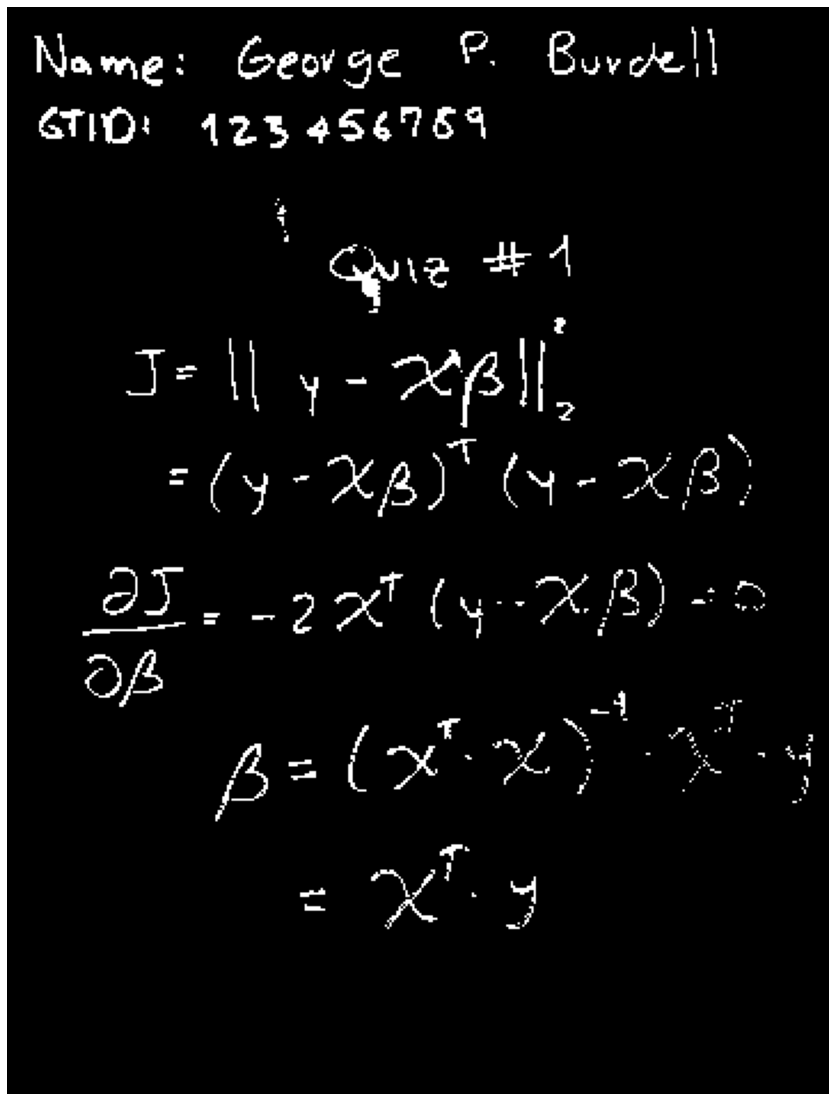

In [32]:
plt.figure(figsize=(30,20))
plt.imshow(lin_bw, cmap='gray')
plt.axis('off')
plt.show()